In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np

In [44]:
!pip install pyyaml h5py

You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.


In [28]:
! pip install matplotlib

     |████████████████████████████████| 11.5 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 45.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.


In [18]:
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
!pip install keras

In [4]:
! apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package unzip


In [5]:
#!cd ./data
!unzip dataset.zip .

/bin/sh: 1: unzip: not found


In [6]:
!whereis unzip

unzip:


In [7]:
base_dir = './data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')
test_dir = os.path.join(base_dir, 'test')


In [8]:
!pwd

/root


In [9]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [10]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [13]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

#model.compile(optimizer = RMSprop(learning_rate=0.0001), 
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 16,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 16,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [15]:
callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 20,
            epochs = 20,
            validation_steps = 10,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/20
Epoch 1/20
20/20 - 10s - loss: 5.9706 - acc: 0.5875 - val_loss: 0.1820 - val_acc: 0.9563
Epoch 2/20
Epoch 1/20
20/20 - 3s - loss: 0.8356 - acc: 0.7469 - val_loss: 1.0010 - val_acc: 0.8313
Epoch 3/20
Epoch 1/20
20/20 - 3s - loss: 1.4307 - acc: 0.7406 - val_loss: 1.9657 - val_acc: 0.7750
Epoch 4/20
Epoch 1/20
20/20 - 4s - loss: 0.5846 - acc: 0.8170 - val_loss: 0.2632 - val_acc: 0.9563
Epoch 5/20
Epoch 1/20
20/20 - 4s - loss: 0.4072 - acc: 0.8438 - val_loss: 0.4028 - val_acc: 0.9187
Epoch 6/20
Epoch 1/20
20/20 - 4s - loss: 0.3535 - acc: 0.8500 - val_loss: 0.0987 - val_acc: 0.9750
Epoch 7/20
Epoch 1/20
20/20 - 3s - loss: 0.4130 - acc: 0.8594 - val_loss: 0.1009 - val_acc: 0.9688
Epoch 8/20
Epoch 1/20
20/20 - 4s - loss: 0.4054 - acc: 0.8562 - val_loss: 0.0541 - val_acc: 0.9812
Epoch 9/20
Epoch 1/20
20/20 - 4s - loss: 0.2472 - acc: 0.9125 - val_loss: 0.5617 - val_acc: 0.8188
Epoch 10/20
Epoch 1/20
20/20 - 4s - loss: 0.3402 - acc: 0.8531 - val_loss: 0.0332 - val_acc: 0.9812
Epoch 11

In [19]:
path='./data/test/with_mask/'
i=0
for x in os.listdir(path):
    if x.endswith(".jpg"):
        # Prints only text file present in My Folder
        img_name=path+x
        print(img_name)
        test_image=image.load_img(img_name, target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=model.predict(test_image)[0][0]
        print("prediction for {} is {}".format(img_name,pred))
        i=i+1
        if i>10:
            break

./data/test/with_mask/357-with-mask.jpg
prediction for ./data/test/with_mask/357-with-mask.jpg is 0.0
./data/test/with_mask/456-with-mask.jpg
prediction for ./data/test/with_mask/456-with-mask.jpg is 1.0
./data/test/with_mask/78-with-mask.jpg
prediction for ./data/test/with_mask/78-with-mask.jpg is 0.0
./data/test/with_mask/285-with-mask.jpg
prediction for ./data/test/with_mask/285-with-mask.jpg is 0.0
./data/test/with_mask/186-with-mask.jpg
prediction for ./data/test/with_mask/186-with-mask.jpg is 0.0
./data/test/with_mask/429-with-mask.jpg
prediction for ./data/test/with_mask/429-with-mask.jpg is 0.0
./data/test/with_mask/34-with-mask.jpg
prediction for ./data/test/with_mask/34-with-mask.jpg is 0.0
./data/test/with_mask/160-with-mask.jpg
prediction for ./data/test/with_mask/160-with-mask.jpg is 0.0
./data/test/with_mask/106-with-mask.jpg
prediction for ./data/test/with_mask/106-with-mask.jpg is 0.0
./data/test/with_mask/421-with-mask.jpg
prediction for ./data/test/with_mask/421-with-

In [21]:
path='./data/test/without_mask/'
i=0
for x in os.listdir(path):
    if x.endswith(".jpg"):
        # Prints only text file present in My Folder
        img_name=path+x
        print(img_name)
        test_image=image.load_img(img_name, target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=model.predict(test_image)[0][0]
        print("prediction for {} is {}".format(img_name,pred))
        i=i+1
        if i>10:
            break

./data/test/without_mask/10.jpg
prediction for ./data/test/without_mask/10.jpg is 0.2986867427825928
./data/test/without_mask/89.jpg
prediction for ./data/test/without_mask/89.jpg is 1.0
./data/test/without_mask/179.jpg
prediction for ./data/test/without_mask/179.jpg is 0.0
./data/test/without_mask/368.jpg
prediction for ./data/test/without_mask/368.jpg is 0.0
./data/test/without_mask/54.jpg
prediction for ./data/test/without_mask/54.jpg is 0.0
./data/test/without_mask/261.jpg
prediction for ./data/test/without_mask/261.jpg is 0.0
./data/test/without_mask/324.jpg
prediction for ./data/test/without_mask/324.jpg is 0.0
./data/test/without_mask/117.jpg
prediction for ./data/test/without_mask/117.jpg is 0.0
./data/test/without_mask/432.jpg
prediction for ./data/test/without_mask/432.jpg is 0.0
./data/test/without_mask/270.jpg
prediction for ./data/test/without_mask/270.jpg is 0.0
./data/test/without_mask/399.jpg
prediction for ./data/test/without_mask/399.jpg is 0.0


In [24]:
from keras.preprocessing import image

In [35]:
from PIL import Image

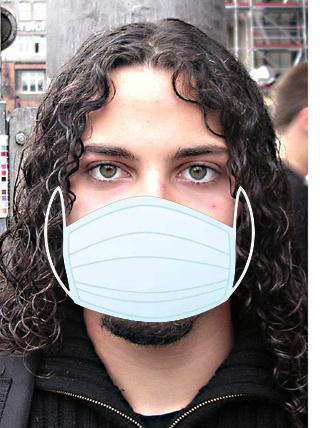

In [39]:
Image.open('./data/test/with_mask/340-with-mask.jpg')

INFO:matplotlib.font_manager:Generating new fontManager, this may take some time...


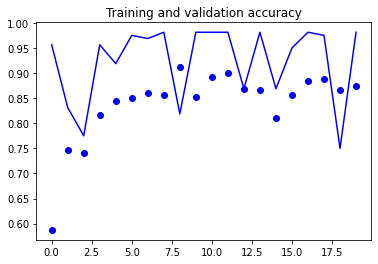

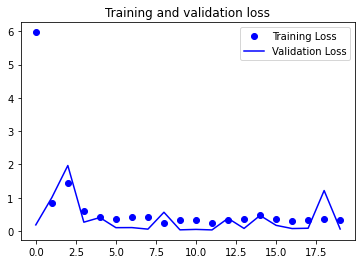

In [30]:


import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [31]:
last_layer = pre_trained_model.get_layer('mixed7') #Only use layers including and above 'mixed7'
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [32]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model_tl = Model( pre_trained_model.input, x) 

#model.compile(optimizer = RMSprop(learning_rate=0.0001), 
model_tl.compile(optimizer = 'adam',               
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

last layer output shape:  (None, 7, 7, 768)


In [33]:

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 16,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 16,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))



Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [34]:
callbacks = myCallback()
history = model_tl.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 20,
            epochs = 20,
            validation_steps = 10,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/20
Epoch 1/20
20/20 - 7s - loss: 0.9613 - acc: 0.7647 - val_loss: 0.3026 - val_acc: 0.9312
Epoch 2/20
Epoch 1/20
20/20 - 3s - loss: 0.3995 - acc: 0.8844 - val_loss: 0.1318 - val_acc: 0.9875
Epoch 3/20
Epoch 1/20
20/20 - 4s - loss: 0.3489 - acc: 0.9000 - val_loss: 0.1490 - val_acc: 0.9750
Epoch 4/20
Epoch 1/20
20/20 - 3s - loss: 0.3919 - acc: 0.8969 - val_loss: 0.1746 - val_acc: 0.9688
Epoch 5/20
Epoch 1/20
20/20 - 4s - loss: 0.3011 - acc: 0.9250 - val_loss: 0.1581 - val_acc: 0.9688
Epoch 6/20
Epoch 1/20
20/20 - 3s - loss: 0.2090 - acc: 0.9412 - val_loss: 0.0919 - val_acc: 0.9875
Epoch 7/20
Epoch 1/20
20/20 - 4s - loss: 0.3355 - acc: 0.9156 - val_loss: 0.0870 - val_acc: 0.9750
Epoch 8/20
Epoch 1/20
20/20 - 3s - loss: 0.2361 - acc: 0.9219 - val_loss: 0.0852 - val_acc: 0.9875
Epoch 9/20
Epoch 1/20
20/20 - 4s - loss: 0.2847 - acc: 0.9062 - val_loss: 0.0821 - val_acc: 0.9812
Epoch 10/20
Epoch 1/20
20/20 - 4s - loss: 0.2010 - acc: 0.9250 - val_loss: 0.0448 - val_acc: 0.9875
Epoch 11/

In [40]:
path='./data/test/without_mask/'
i=0
for x in os.listdir(path):
    if x.endswith(".jpg"):
        # Prints only text file present in My Folder
        img_name=path+x
        print(img_name)
        test_image=image.load_img(img_name, target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image = test_image/255
        test_image=np.expand_dims(test_image,axis=0)
        pred=model_tl.predict(test_image)
        print("prediction ",pred)
        #y_classes = pred.argmax(axis=-1)
        y_classes = np.argmax(pred)
        print("y_classes",int(pred[0][0]))
        print("prediction for {} is {}".format(img_name,pred[0][0]))
        i=i+1
        if i>10:
            break

./data/test/without_mask/10.jpg
prediction  [[0.99999976]]
y_classes 0
prediction for ./data/test/without_mask/10.jpg is 0.9999997615814209
./data/test/without_mask/89.jpg
prediction  [[0.9999733]]
y_classes 0
prediction for ./data/test/without_mask/89.jpg is 0.9999732971191406
./data/test/without_mask/179.jpg
prediction  [[1.]]
y_classes 1
prediction for ./data/test/without_mask/179.jpg is 1.0
./data/test/without_mask/368.jpg
prediction  [[0.9998337]]
y_classes 0
prediction for ./data/test/without_mask/368.jpg is 0.9998337030410767
./data/test/without_mask/54.jpg
prediction  [[1.]]
y_classes 1
prediction for ./data/test/without_mask/54.jpg is 1.0
./data/test/without_mask/261.jpg
prediction  [[0.9999999]]
y_classes 0
prediction for ./data/test/without_mask/261.jpg is 0.9999998807907104
./data/test/without_mask/324.jpg
prediction  [[1.]]
y_classes 1
prediction for ./data/test/without_mask/324.jpg is 1.0
./data/test/without_mask/117.jpg
prediction  [[1.]]
y_classes 1
prediction for ./dat

In [41]:
path='./data/test/with_mask/'
i=0
for x in os.listdir(path):
    if x.endswith(".jpg"):
        # Prints only text file present in My Folder
        img_name=path+x
        print(img_name)
        test_image=image.load_img(img_name, target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image = test_image/255
        test_image=np.expand_dims(test_image,axis=0)
        pred=model_tl.predict(test_image)
        print("prediction ",pred)
        y_classes = np.argmax(pred[0])
        print("y_classes ",int(pred[0][0]))
        print("prediction for {} is {}".format(img_name,pred[0][0]))
        i=i+1
        if i>10:
            break

./data/test/with_mask/357-with-mask.jpg
prediction  [[0.]]
y_classes  0
prediction for ./data/test/with_mask/357-with-mask.jpg is 0.0
./data/test/with_mask/456-with-mask.jpg
prediction  [[0.]]
y_classes  0
prediction for ./data/test/with_mask/456-with-mask.jpg is 0.0
./data/test/with_mask/78-with-mask.jpg
prediction  [[1.738539e-08]]
y_classes  0
prediction for ./data/test/with_mask/78-with-mask.jpg is 1.738538912832155e-08
./data/test/with_mask/285-with-mask.jpg
prediction  [[0.]]
y_classes  0
prediction for ./data/test/with_mask/285-with-mask.jpg is 0.0
./data/test/with_mask/186-with-mask.jpg
prediction  [[0.]]
y_classes  0
prediction for ./data/test/with_mask/186-with-mask.jpg is 0.0
./data/test/with_mask/429-with-mask.jpg
prediction  [[0.]]
y_classes  0
prediction for ./data/test/with_mask/429-with-mask.jpg is 0.0
./data/test/with_mask/34-with-mask.jpg
prediction  [[0.]]
y_classes  0
prediction for ./data/test/with_mask/34-with-mask.jpg is 0.0
./data/test/with_mask/160-with-mask.jp

In [42]:
#model.summary()

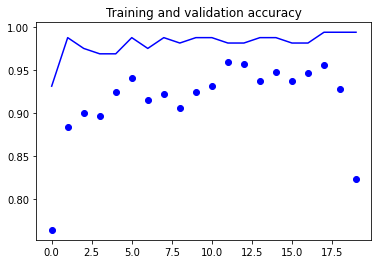

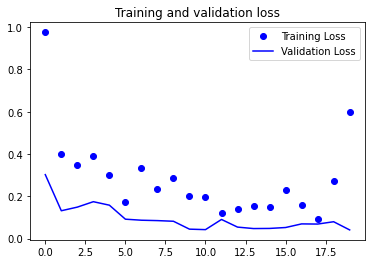

In [43]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [46]:
# Save the weights
model_tl.save_weights('./checkpoints/my_checkpoint_tl')


In [47]:
# Create a new model instance
model_tl_new = create_model()


NameError: name 'create_model' is not defined

In [48]:
!mkdir -p saved_facemask_tl_model



In [49]:
model.save('saved_facemask_tl_model/facemask_model')

In [50]:
new_model = tf.keras.models.load_model('saved_facemask_tl_model/facemask_model')

# Check its architecture
new_model.summary()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________